## Objective:
Perform exploratory data analysis (EDA) and data preprocessing to identify key factors associated with the risk of stroke based on demographic and health-related features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
((df['bmi'].isnull().sum())/len(df))*100

3.9334637964774952

<AxesSubplot:xlabel='bmi', ylabel='Count'>

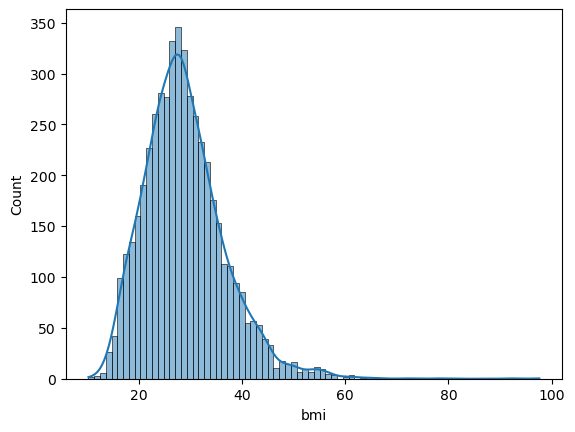

In [10]:
sns.histplot(df['bmi'],kde=True)

In [11]:
df['bmi'].fillna(df['bmi'].median(), inplace = True)

In [12]:
df['bmi'].isnull().sum()

0

### Duplicates

In [13]:
df.duplicated().sum()

0

- No duplicates

### Outliers

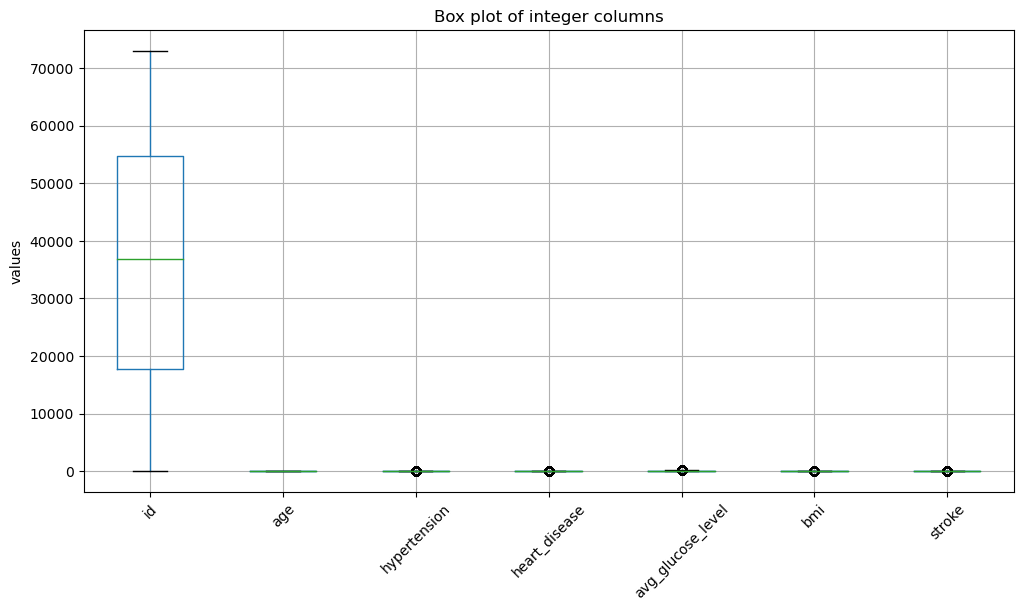

In [16]:
int_col = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(12,6))
df[int_col].boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of integer columns')
plt.ylabel('values')
plt.show()

In [22]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- No outliers

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


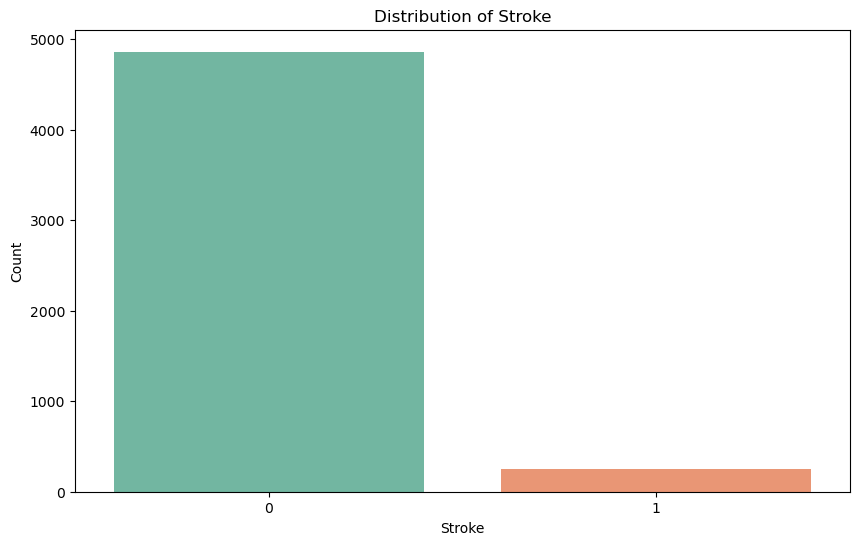

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df['stroke'], palette='Set2')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke')
plt.show()

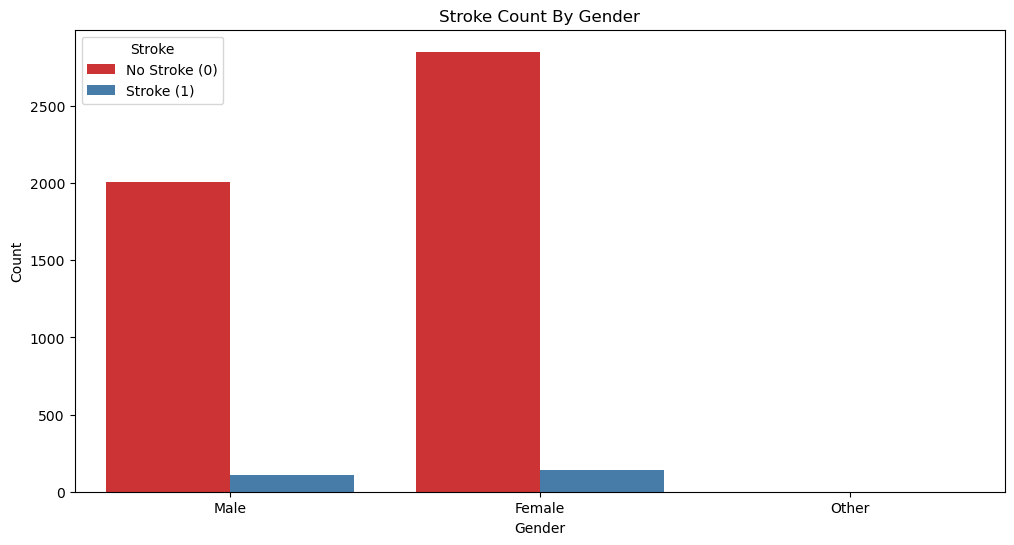

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Count By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

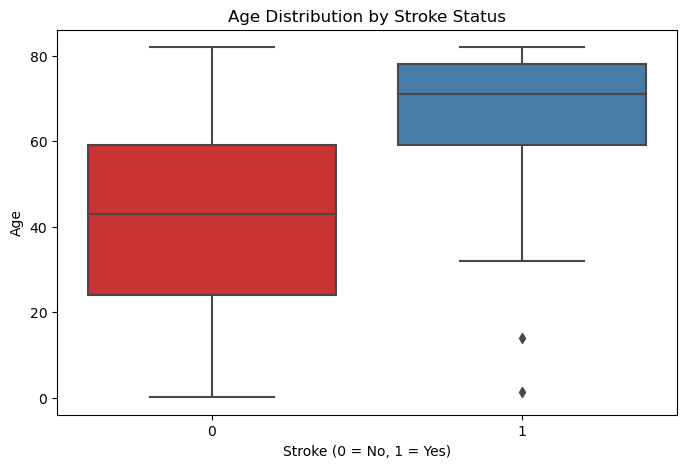

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=df, palette='Set1')

plt.title("Age Distribution by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

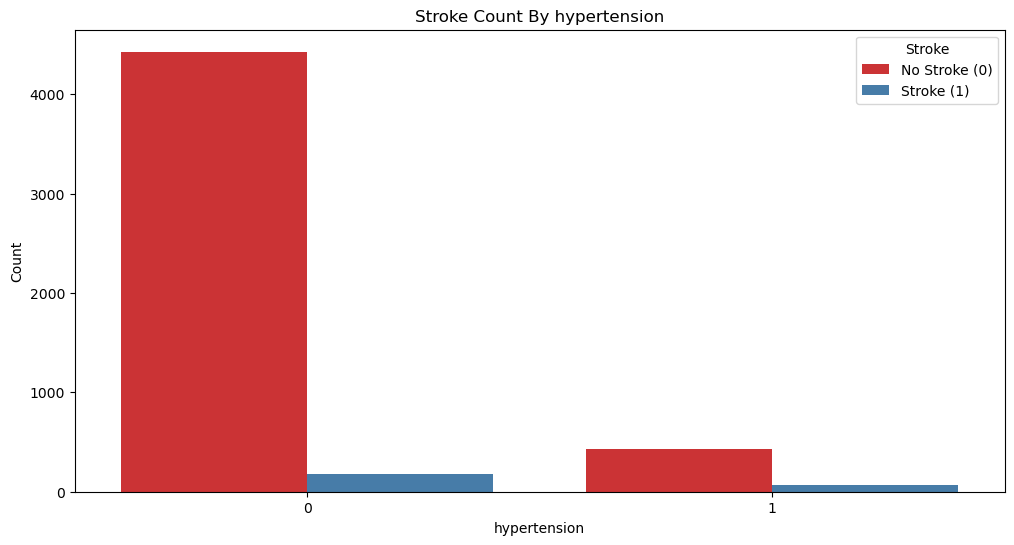

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Count By hypertension')
plt.xlabel('hypertension')
plt.ylabel('Count')
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

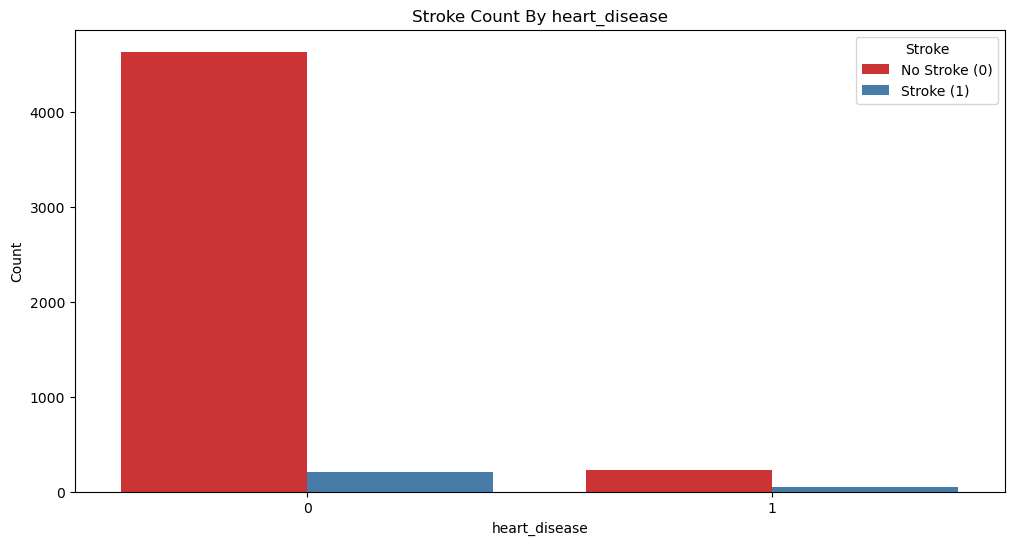

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Count By heart_disease')
plt.xlabel('heart_disease')
plt.ylabel('Count')
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

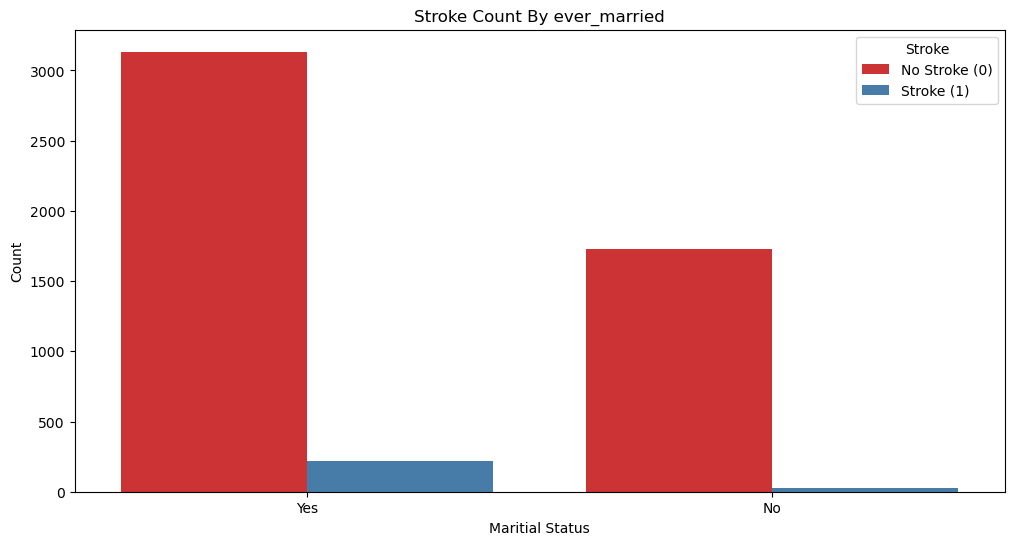

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='ever_married', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Count By ever_married')
plt.xlabel('Maritial Status')
plt.ylabel('Count')
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

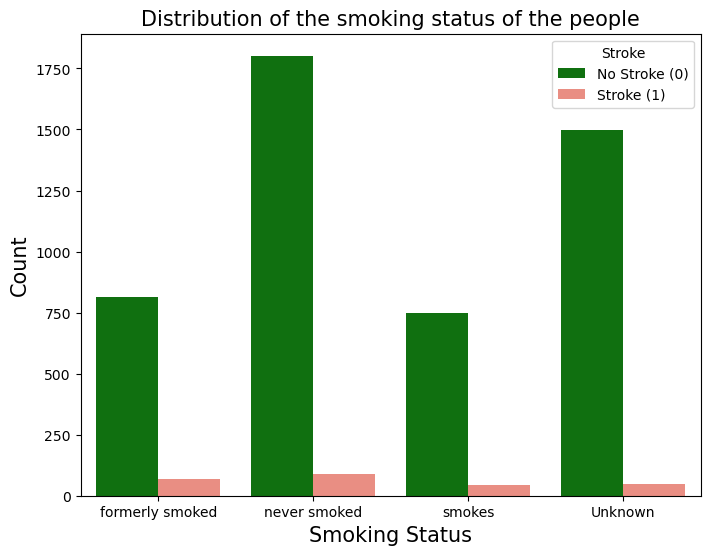

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking_status", data=df, hue='stroke', palette=["green","salmon"],orient="v")
plt.title('Distribution of the smoking status of the people',fontsize=15)
plt.xlabel('Smoking Status',fontsize =15)
plt.ylabel('Count', fontsize = 15)
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

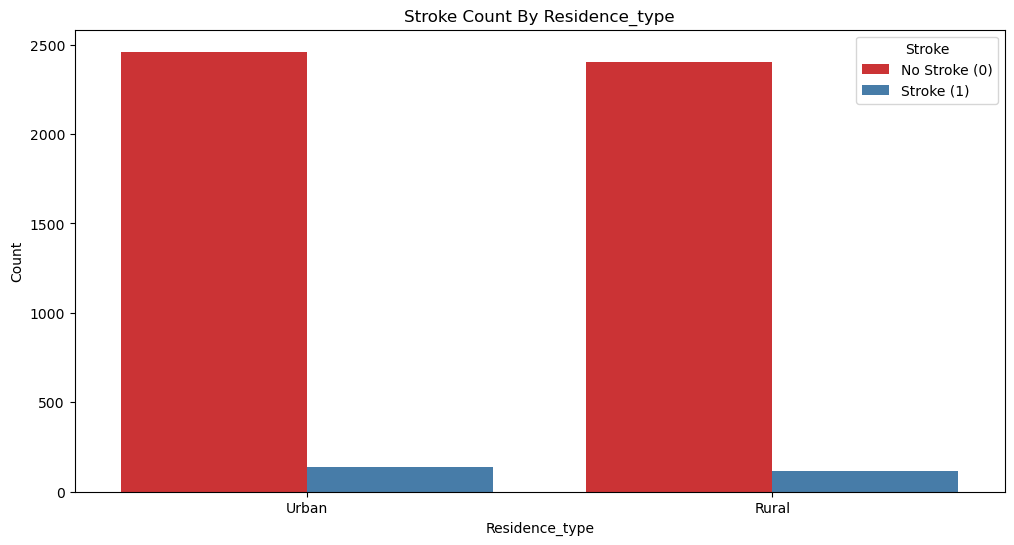

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='Residence_type', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Count By Residence_type')
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

### Project Summary: Stroke Prediction – Data Preprocessing & EDA
**Objective**:
The goal of this project is to analyze the Stroke Prediction Dataset to identify key factors associated with stroke risk. Through data preprocessing and exploratory data analysis (EDA), we aim to clean, visualize, and understand patterns in the dataset.

**Data Preprocessing Steps**:
- Handling Missing Values: BMI had 4% missing values, imputed using median (due to right-skewed distribution).
- Handling Outliers: Used box plots to detect outliers in numerical columns (e.g., age, avg_glucose_level, BMI).

**Exploratory Data Analysis (EDA):**
- Stroke vs. Age: Stroke cases were more frequent in older individuals.
- Gender vs. Stroke: Stroke rates were slightly higher in some gender categories.
- BMI Analysis: Positively skewed, median imputation was applied.
- Hypertension & Heart Disease: People with these conditions had a higher likelihood of stroke.
- Visualizations Used: Box plots, count plots, and bar charts to explore feature relationships.

**Key Insights:**
- Age is a strong factor in stroke cases, with most stroke patients being elderly.
- Hypertension and heart disease are associated with an increased risk of stroke.
- Smoking status shows some variation, but further statistical testing is needed